# STAT 207 Homework 9 [25 points]

## Logistic Regression & Classifiers

Due: Thursday, April 10, end of day (11:59 pm CT)

Late submissions accepted until Friday, April 11 at noon

<hr>

## Imports 

Run the following code cell to import the necessary packages into the file.  You may import additional packages, as needed for this assignment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf

## Case Study: Heart Disease

Can we identify patients who have heart disease based on other patient characteristics?

We will use the following information about patients:

- **age**: age
- **sex**: sex, 1 = male, 0 = female
- **cp**: chest pain type, 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
- **trestbps**: resting blood pressure (in mm Hg)
- **chol**: serum cholesterol in mg/dl
- **fbs**: whether the fasting blood sugar is above 120 mg/dl (1 = true, 0 = false)
- **restecg**: resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (1 = yes, 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
- **ca**: number of major vessels (0-3) colored by flouroscopy (for calcification of vessels)
- **thal**: number of nuclear stress test (3 = normal, 6 = fixed defect, 7 = reversible defect)
- **num**: target number of progression of heart disease (1+ indicates at least 50% narrowing
- **y**: our target, generated below, for the presence of heart disease (1 = present, 0 = absent)

The data originally came from https://archive.ics.uci.edu/dataset/45/heart+disease.

Run the code in the cell below to read in the data for this document.  The data is saved as `df` with this code.  

In [2]:
df = pd.read_csv('processed_cleveland.csv', na_values = ['?'])
df = df.dropna()
df['y'] = 1 * (df['num'] > 0)
df['sex'] = df['sex'].replace({1: 'male', 0: 'female'})
df['cp'] = df['cp'].replace({1: 'typical', 2:'atypical', 3: 'non-anginal', 4: 'asymptomatic'})
df['fbs'] = df['fbs'].replace({1: 'high', 0: 'typical'})
df['restecg'] = df['restecg'].replace({0: 'normal', 1:'ST-T wave abnormality', 2: 'left ventricular hypertrophy'})
df['exang'] = df['exang'].replace({0: 'no', 1: 'yes'})
df['slope'] = df['slope'].replace({1:'upsloping', 2:'flat', 3:'downsloping'})
df['thal'] = df['thal'].replace({3: 'normal', 6: 'fixed defect', 7:'reversible defect'})

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,y
0,63,male,typical,145,233,high,left ventricular hypertrophy,150,no,2.3,downsloping,0.0,fixed defect,0,0
1,67,male,asymptomatic,160,286,typical,left ventricular hypertrophy,108,yes,1.5,flat,3.0,normal,2,1
2,67,male,asymptomatic,120,229,typical,left ventricular hypertrophy,129,yes,2.6,flat,2.0,reversible defect,1,1
3,37,male,non-anginal,130,250,typical,normal,187,no,3.5,downsloping,0.0,normal,0,0
4,41,female,atypical,130,204,typical,left ventricular hypertrophy,172,no,1.4,upsloping,0.0,normal,0,0


The code below will split the data into a training and a test data, using 20% as our test data and a random state of 403.  We will use our training data exclusively for the first three questions of the assignment.  We won't turn to the test data until the last question.

In [4]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.20, random_state = 403)

## 1. Understand a Logistic Regression Model [2 points]

We know that we would like to predict the presence of heart disease (y).  First, we'll consider a simple model that uses age to predict the presence of heart disease.

**a)** Below, fit the model predicting the presence of heart disease from age using the training data.  Print the summary of the model.

In [5]:
model1 = smf.logit("y ~ age", data=df_train).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.671837
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  237
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                 0.02713
Time:                        17:53:14   Log-Likelihood:                -159.23
converged:                       True   LL-Null:                       -163.67
Covariance Type:            nonrobust   LLR p-value:                  0.002882
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4903      0.820     -3.038      0.002      -4.097      -0.883
age            0.0429      0.

In [7]:
import numpy as np

intercept = model1.params['Intercept']
age_coef = model1.params['age']
intercept, age_coef

(-2.4903077186534133, 0.04293288613062926)

In [8]:
log_odds_age0 = intercept
odds_age0 = np.exp(log_odds_age0)
odds_age0

0.0828844575569053

In [9]:
log_odds_age25 = intercept + 25 * age_coef
prob_age25 = 1 / (1 + np.exp(-log_odds_age25))
prob_age25

0.1951345868425448

In [10]:
log_odds_thresh = np.log(0.6 / (1 - 0.6))
age_threshold = (log_odds_thresh - intercept) / age_coef

age_threshold

67.44882740822005

In [11]:
odds_ratio = np.exp(age_coef)

odds_ratio

1.0438678344901438

In [12]:
p_value_age = model1.pvalues['age']
p_value_age

0.003622347842169721

**b)** Generate the fitted vs. deviance residual plot for this model.

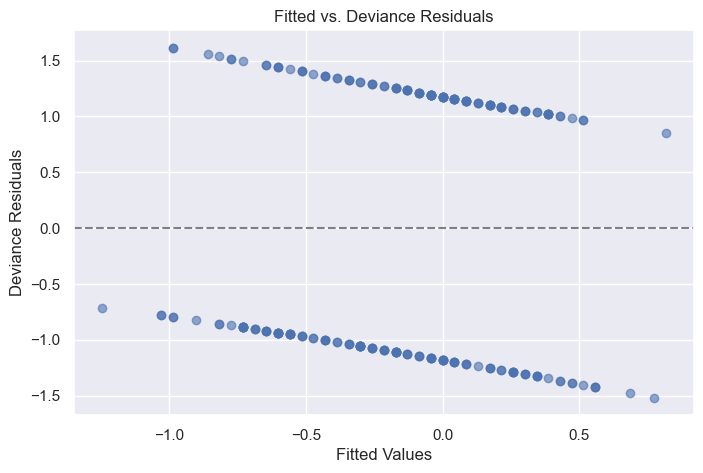

In [17]:
fitted_vals = model1.fittedvalues

residuals = model1.resid_dev

plt.figure(figsize=(8,5))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Fitted Values')
plt.ylabel('Deviance Residuals')
plt.title('Fitted vs. Deviance Residuals')

plt.show()

## 2. Fitting a More Complex Model [1 point]

We'd like to explore how effective advanced tests are at recognizing the risk of heart disease.  We'll fit a second model to the training data predicting y from age, sex, restecg, thalach, exang, oldpeak, slope, ca, and thal.  Be sure to print the output of your model below.

In [20]:
import statsmodels.formula.api as smf

model2 = smf.logit(formula='y ~ age + sex + restecg + thalach + exang + oldpeak + slope + ca + thal', data=df_train).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.320657
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  237
Model:                          Logit   Df Residuals:                      224
Method:                           MLE   Df Model:                           12
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                  0.5357
Time:                        18:14:53   Log-Likelihood:                -75.996
converged:                       True   LL-Null:                       -163.67
Covariance Type:            nonrobust   LLR p-value:                 3.852e-31
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   6.1391

In [21]:
pseudo_r2 = model2.prsquared
pseudo_r2

0.5356652166746367

In [22]:
from sklearn.metrics import roc_auc_score

y_train_true = df_train['y']
y_train_probs = model2.predict(df_train)
auc_score = roc_auc_score(y_train_true, y_train_probs)

auc_score

0.9333571939871151

## 3. Build a Classifier [1.5 points]

Using the model from Question 2, build a classifier to our training data using a predictive probability threshold of 0.75.  Then, generate a confusion matrix from this model.

In [23]:
pred_prob = model2.predict(df_train)
df_train['predictive_prob'] = pred_prob
pred_prob

22     0.155634
262    0.008466
200    0.033621
246    0.697599
100    0.050655
         ...   
150    0.393143
52     0.454949
207    0.935728
120    0.990351
180    0.681154
Length: 237, dtype: float64

In [24]:
df_train['predictive_prob'] = model2.predict(df_train)

df_train['y_hat'] = 1 * (df_train['predictive_prob'] >= 0.75)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df_train['y'], df_train['y_hat'])
print(conf_matrix)


[[121   6]
 [ 33  77]]


In [25]:
acc = (77+121)/(121+6+33+77)

acc

0.8354430379746836

## 4. Test Data [1 point]

Finally, apply your logistic regression model from **Question 2** to your test data, calculating the predicted probabilities on your test data.

*Hint:* You do not need to fit a new model to answer this question.

In [26]:
df_test['predictive_prob'] = model2.predict(df_test)
df_test[['predictive_prob','y']].head()

,predictive_prob,y
188,0.638764,1
124,0.322066,1
35,0.033091,0
151,0.250493,0
14,0.317784,0


In [27]:
from sklearn.metrics import roc_auc_score

aucc = roc_auc_score(y_true=df_test['y'], 
                            y_score=df_test['predictive_prob'])
aucc

0.8170594837261503

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 9 Canvas Assignment to submit your notebook to GitHub.